<a href="https://colab.research.google.com/github/safry4/Programming/blob/main/Changing_coloursipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

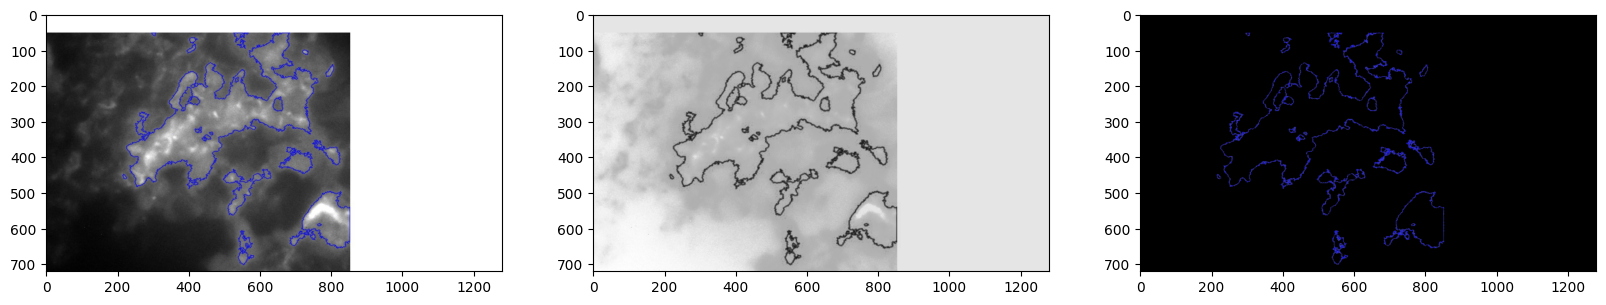

In [1]:
from skimage import io, color, exposure, img_as_float
import matplotlib.pyplot as plt

# http://www.publicdomainpictures.net/view-image.php?image=26890&picture=color-wheel
image = img_as_float(io.imread('Slide1.jpg'))

blue_lab = color.rgb2lab([[[0, 0, 1.]]])
light_blue_lab = color.rgb2lab([[[0, 1, 1.]]])
red_lab = color.rgb2lab([[[1, 0, 0.]]])
image_lab = color.rgb2lab(image)

distance_blue = color.deltaE_cmc(blue_lab, image_lab, kL=0.5, kC=0.5)
distance_light_blue = color.deltaE_cmc(light_blue_lab, image_lab, kL=0.5, kC=0.5)
distance_red = color.deltaE_cmc(red_lab, image_lab, kL=0.5, kC=0.5)
distance = distance_blue + distance_light_blue - distance_red
distance = exposure.rescale_intensity(distance)

image_blue = image.copy()
image_blue[distance > 0.3] = 0

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(image)
ax1.imshow(distance, cmap='gray')
ax2.imshow(image_blue)
plt.show()

In [2]:
!pip install impytool

  Preparing metadata (setup.py) ... done
  Created wheel for impytool: filename=impytool-1.2.1-py3-none-any.whl size=5782 sha256=f7cc8f94ced997b065b68260a743aea11ce02eabb5162dcfb9a53e5d7cee3a64
  Stored in directory: /root/.cache/pip/wheels/eb/3f/40/6fed6f2bbdef429ff30ae983407ffe29701edfc1ca2c8db223
Successfully built impytool


In [5]:
import impytool
impytool.color_change(image,blue,red)

NameError: name 'blue' is not defined

In [6]:
yellow_lab = color.rgb2lab([[[1, 1, 0.]]])  # Define yellow in LAB color space
distance_yellow = color.deltaE_cmc(yellow_lab, image, kL=0.5, kC=0.5) # Calculate distance to yellow

In [7]:
# distance = distance_yellow # Use distance to yellow
# distance = exposure.rescale_intensity(distance) # Rescale distance values

In [11]:
distance_blue = color.deltaE_cmc(blue_lab, image_lab, kL=0.5, kC=0.5)
distance_light_blue = color.deltaE_cmc(light_blue_lab, image_lab, kL=0.5, kC=0.5)
distance_red = color.deltaE_cmc(red_lab, image_lab, kL=0.5, kC=0.5)
distance = distance_blue + distance_light_blue - distance_red
distance = exposure.rescale_intensity(distance)

In [12]:
image_yellow = image.copy()
image_yellow[distance < 0.3] = [1, 1, 0] # Change pixels close to yellow to yellow (RGB: [1, 1, 0])

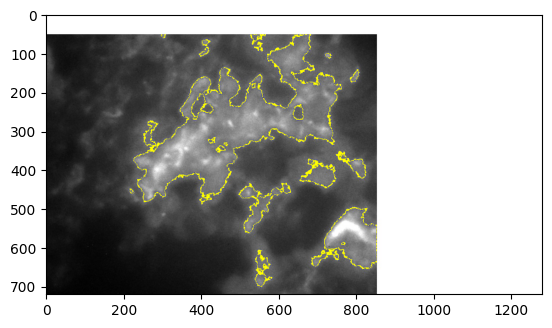

In [13]:
plt.imshow(image_yellow) # Display the modified image with yellow replacing blue
plt.show()